# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [30]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [31]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [32]:
data.describe

<bound method NDFrame.describe of      id   ad  education  ofjobs  yearsexp  honors  volunteer  military  \
0     b    1          4       2         6       0          0         0   
1     b    1          3       3         6       0          1         1   
2     b    1          4       1         6       0          0         0   
3     b    1          3       4         6       0          1         0   
4     b    1          3       3        22       0          0         0   
5     b    1          4       2         6       1          0         0   
6     b    1          4       2         5       0          1         0   
7     b    1          3       4        21       0          1         0   
8     b    1          4       3         3       0          0         0   
9     b    1          4       2         6       0          1         0   
10    b    1          4       4         8       0          1         0   
11    b    1          4       4         8       0          0         0   
12  

In [33]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

1. What test is appropriate for this problem? Does CLT apply?

Central Limit Theorum does in fact apply since we have a sufficiently large data set that we should see a normal distribution of response rates.

Since we can assume the data is normally distributed and we know the mean and standard deviation a Z-test makes the most sense.

2. What are the null and alternate hypotheses?

The Null Hypothesis is that there is no difference in response rate between racial groups, particularly when controlled for quality of resume or neighborhood. The Alternate is that there is measurable discrimination as shown by lower response rates for African American sounding names. 

In [34]:
w = data[data.race=='w']
b = data[data.race=='b']

<div class="span5 alert alert-success">
<p>3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.</p>
</div>

In [84]:
# Your solution to Q3 here
w_mu = len(w[w.call ==1])/len(w)
w_mu


b_mu=len(b[b.call ==1])/len(b)
b_mu

gen_mu = len(data[data.call ==1])/len(data)

print("white sounding success % :",round(w_mu,3))
print("afam sounding success % :",round(b_mu,3))
print("overall success % :",round(gen_mu,3))

white sounding success % : 0.097
afam sounding success % : 0.064
overall success % : 0.08


In [127]:
w_obs = np.sum(w.call ==1)
w_obs
w_n = len(w)

b_obs = np.sum(b.call ==1)
b_obs
b_n = len(b)


2435

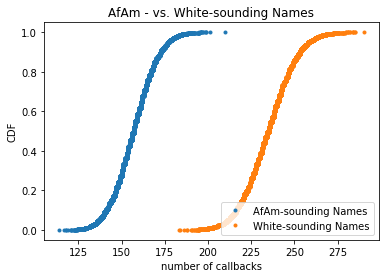

In [89]:

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# extrapoliate vols
w_samp = np.random.binomial(len(w), w_mu, size=10000)
b_samp = np.random.binomial(len(b), b_mu, size=10000)


bx, by = ecdf(b_samp)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samp)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('number of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('AfAm - vs. White-sounding Names')
_ = plt.legend(('AfAm-sounding Names', 'White-sounding Names'))


In [131]:
## calculate z_statistic and p-value

def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p
    

z_stat, p_val = ztest_proportions_two_samples(n1=w_n,r1=w_obs,n2=b_n,r2=b_obs)
                                              
print('z_stat: ', round(z_stat,3))
print('p_val: ', p_val)
                                              

z_stat:  4.108
p_val:  3.983886837577444e-05


In [141]:
## MoE
w_ob_p = w_mu*(1-w_mu)/w_n
b_ob_p =  b_mu*(1-b_mu)/b_n
conf_high = (w_mu-b_mu) + (1.96*(np.sqrt(w_ob_p + b_ob_p)))
conf_low = (w_mu-b_mu) - (1.96*(np.sqrt(w_ob_p + b_ob_p)))

moe = (conf_high - conf_low)/2
print('MoE: ',round(moe*100,3),"%")
print('95% conf int: \t {} - {}'.format(conf_low, conf_high))

MoE:  1.526 %
95% conf int: 	 0.016777447859559147 - 0.047288260559332024


It's safe to say here that the observed difference that's above 3.2% exceeds our MoE and the z-stat is more than four standard deviations above the expected value. Our P-value means we can accept this as significant.

Testing a boostrapped value and frequentist measurements:

In [196]:
## bootstraping a sample of both
np.random.seed(1234)
## create range to store results, running 10k reps
sim_range = np.empty(10000)

## simulating on the actual data.call column
for i in range(10000):
    w_reps = np.sum(np.random.choice(data.call, size=w_n))
    b_reps = np.sum(np.random.choice(data.call, size=b_n))
    
    sim_range[i] = (w_reps - b_reps)/b_n
    
bs_p_value = np.sum(sim_range >= (w_mu-b_mu)) / len(sim_range)


bs_conf = np.percentile(sim_range, [2.5, 97.5])
bs_mean_diff = np.mean(sim_range)

print('obs diff: {}\n'.format(round(w_mu-b_mu,3)))
print('np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_conf))

obs diff: 0.032

np-value: 0.0
95% conf. int.: [-0.01478439  0.01519507]


This bootstrap sample fits in line with our frequentist statistics, with the numbers again lying well above the expected deviation. 

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

4. Write a story describing the statistical significance in the context of the original problem.

Above we outlined what expected range of call backs would be for applicants with white and African American sounding names. The observed rate of call backs for participants with African American sounding names was infact more than 4 standard deviations lower than we would have expected if there was an aproximately even rate of cals. Additionally when we simulated a blind trial it showed that we should have found half the rate of differentiation than the rate we actually observed. Given these numbers we can reject the null hypothesis and conclude that there is some discrimination against applicants with African American sounding names.

5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The study controlled for other variables such as experience and gaps in resume, in order to have implied race be the only differentiating factor, so we would be safe in that assumption. That said, we could perhaps measure this using a logistic regression model or other method to prove it here if we were to go back and use some advanced statistical methods. 